# Ecommerce Customer Segment
Project Abstract : A key challenge for ecommerce business is to analyze the trends in the market to increase their sales.The trend can be easily observed if companies can group their customers based on the activity of their ecommerce site. This grouping can be done by applying different criteria like previous orders most searched brands and so on.

### Project level Analysis of Data

In [1]:
#importng the dependencies

import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#reading the data

raw_data = pd.read_excel('cust_data.xlsx', index_col = 0)
raw_data.iloc[1, :]       #observing row 1

Gender                    F
Orders                    0
Jordan                    0
Gatorade                  1
Samsung                   0
Asus                      0
Udis                      0
Mondelez International    0
Wrangler                  0
Vans                      0
Fila                      0
Brooks                    0
H&M                       1
Dairy Queen               0
Fendi                     0
Hewlett Packard           0
Pladis                    0
Asics                     0
Siemens                   0
J.M. Smucker              2
Pop Chips                 2
Juniper                   1
Huawei                    0
Compaq                    0
IBM                       0
Burberry                  6
Mi                        4
LG                        0
Dior                      1
Scabal                    0
Tommy Hilfiger            0
Hollister                 0
Forever 21                0
Colavita                  0
Microsoft                 0
Jiffy mix           

In [3]:
#observing the data

raw_data.tail()

,Gender,Orders,Jordan,Gatorade,Samsung,Asus,Udis,Mondelez International,Wrangler,Vans,...,LG,Dior,Scabal,Tommy Hilfiger,Hollister,Forever 21,Colavita,Microsoft,Jiffy mix,Kraft
Cust_ID,,,,,,,,,,,,,,,,,,,,,
29996,M,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
29997,M,1,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
29998,M,0,0,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
29999,M,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
30000,F,3,2,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30000 entries, 1 to 30000
Data columns (total 37 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Gender                  27276 non-null  object
 1   Orders                  30000 non-null  int64 
 2   Jordan                  30000 non-null  int64 
 3   Gatorade                30000 non-null  int64 
 4   Samsung                 30000 non-null  int64 
 5   Asus                    30000 non-null  int64 
 6   Udis                    30000 non-null  int64 
 7   Mondelez International  30000 non-null  int64 
 8   Wrangler                30000 non-null  int64 
 9   Vans                    30000 non-null  int64 
 10  Fila                    30000 non-null  int64 
 11  Brooks                  30000 non-null  int64 
 12  H&M                     30000 non-null  int64 
 13  Dairy Queen             30000 non-null  int64 
 14  Fendi                   30000 non-null  int64 
 15  He

In [5]:
raw_data.shape

(30000, 37)

In [6]:
#freezing the shape and size of the data

shape1 = raw_data.shape
shape1

(30000, 37)

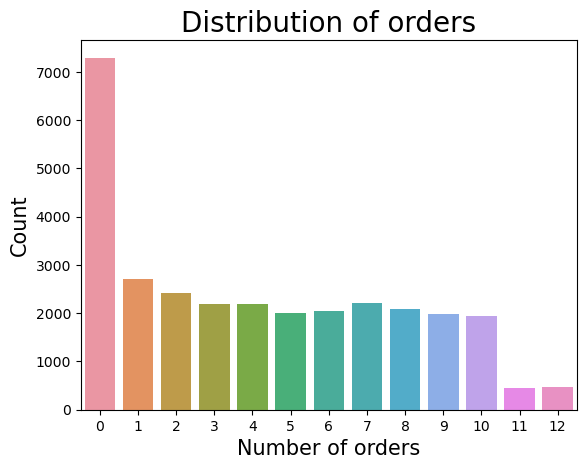

In [7]:
#Visualizing Orders column 
    
sns.countplot(data = raw_data, x = 'Orders')
plt.title("Distribution of orders", fontsize = 20)
plt.xlabel("Number of orders", fontsize = 15)
plt.ylabel("Count", fontsize = 15)
plt.show()

In [8]:
raw_data[raw_data['Orders']==0].Gender.value_counts()

F    5090
M    1204
Name: Gender, dtype: int64

#### There are about 7K customers who have not placed any order followed by about 2500 customers who have ordered 1 product 

further to this analysis, we see a huge proportion of customer who are actully visiting but they are not purchasing anything, so we would like to investigate the reason behindd this behaviour of customer.
We can check for what is the gender distribution of such customers ans also we can check what all items are searched by this customer the most see a huge propotion of customer who are actually visiting but

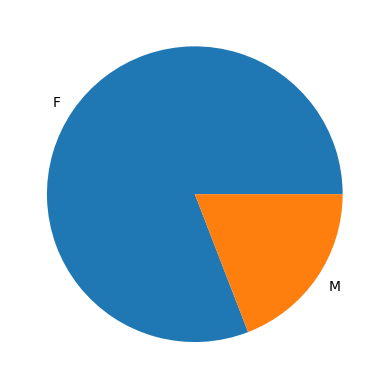

In [9]:
plt.pie(raw_data[raw_data['Orders']==0].Gender.value_counts(), labels=raw_data[raw_data['Orders']==0].Gender.value_counts().index);

#### We can see that there are more than 75 percent females are visiting the website but not purchasing anything.

In [10]:
raw_data[raw_data['Orders']==0].iloc[:, 2:].sum().sort_values(ascending=False)[:10]

J.M. Smucker    4975
Juniper         3459
Burberry        2758
Scabal          2451
H&M             2019
Asics           1802
Dior            1762
Huawei          1743
Jordan          1604
Pop Chips       1582
dtype: int64

#### The customers who are searching the items without ordering are looking for the product J. M. Smucker followed by Juniper, Burberry etc.

In [11]:
raw_data[(raw_data['Orders']==0)&(raw_data['Gender']=='F')].iloc[:,2:].sum().sort_values(ascending=False).head(10)

J.M. Smucker    3775
Juniper         2541
Burberry        2289
Scabal          2049
H&M             1745
Dior            1404
Huawei          1349
Asics           1262
Jordan          1170
Pop Chips       1159
dtype: int64

In [12]:
raw_data[(raw_data['Orders']==0)&(raw_data['Gender']=='M')].iloc[:,2:].sum().sort_values(ascending=False).head(10)

J.M. Smucker    734
Juniper         562
Gatorade        431
Asics           357
Jordan          340
Pop Chips       291
Vans            271
Samsung         253
Brooks          235
Huawei          226
dtype: int64

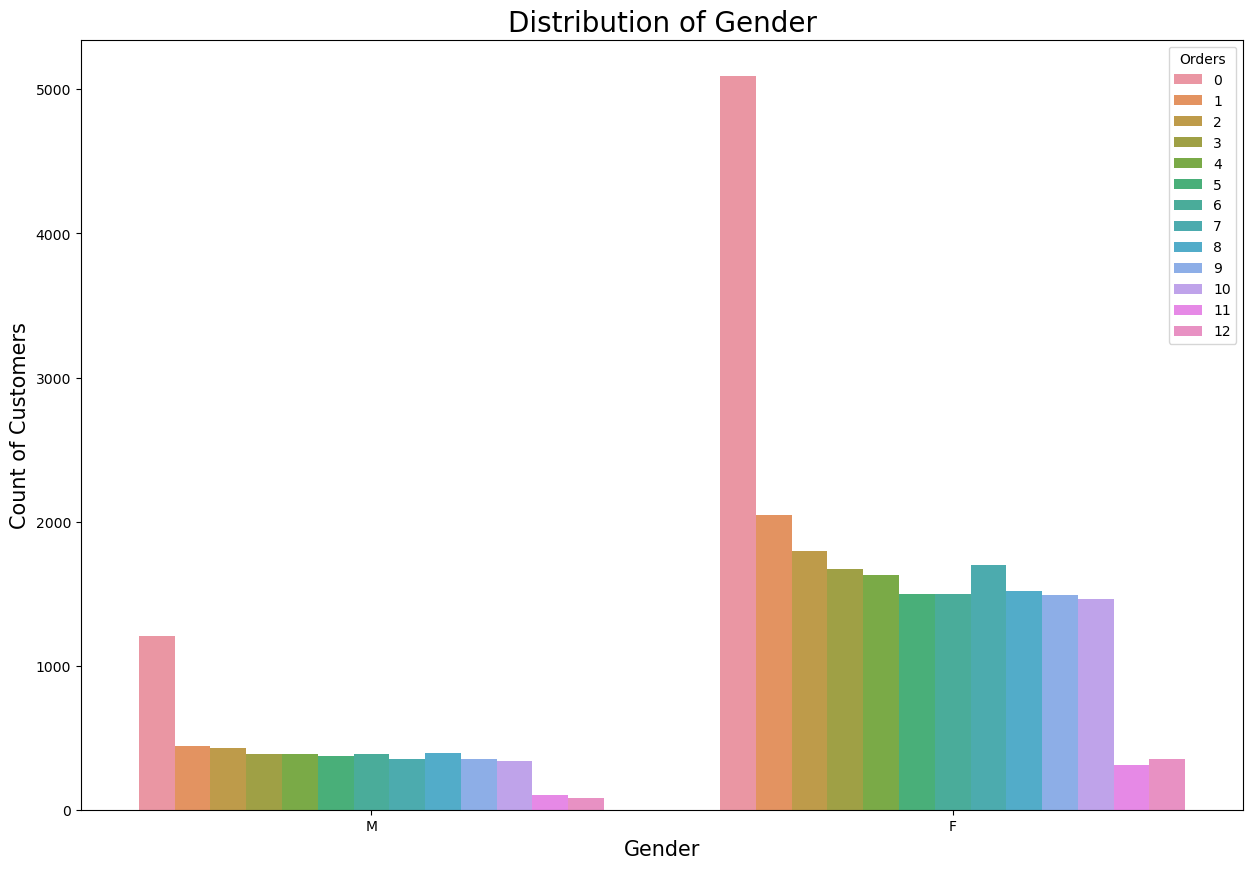

In [13]:
#Visualizing Gender column

plt.figure(figsize=(15,10))
sns.countplot(data = raw_data, x = 'Gender', hue = 'Orders')
plt.title("Distribution of Gender", fontsize = 20)
plt.xlabel("Gender", fontsize = 15)
plt.ylabel("Count of Customers", fontsize = 15)
plt.show()

In [17]:
raw_data.groupby(['Gender'])['Orders'].aggregate(['sum','mean'])

,sum,mean
Gender,,
F,102630,4.141981
M,22464,4.301800


In [19]:
raw_data.fillna(raw_data.Gender.mode()[0], inplace = True)
raw_data.Gender.isnull().sum()

0

In [16]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30000 entries, 1 to 30000
Data columns (total 37 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Gender                  30000 non-null  object
 1   Orders                  30000 non-null  int64 
 2   Jordan                  30000 non-null  int64 
 3   Gatorade                30000 non-null  int64 
 4   Samsung                 30000 non-null  int64 
 5   Asus                    30000 non-null  int64 
 6   Udis                    30000 non-null  int64 
 7   Mondelez International  30000 non-null  int64 
 8   Wrangler                30000 non-null  int64 
 9   Vans                    30000 non-null  int64 
 10  Fila                    30000 non-null  int64 
 11  Brooks                  30000 non-null  int64 
 12  H&M                     30000 non-null  int64 
 13  Dairy Queen             30000 non-null  int64 
 14  Fendi                   30000 non-null  int64 
 15  He

In [21]:
data = pd.get_dummies(raw_data,columns=['Gender'])
data.head()

,Orders,Jordan,Gatorade,Samsung,Asus,Udis,Mondelez International,Wrangler,Vans,Fila,...,Scabal,Tommy Hilfiger,Hollister,Forever 21,Colavita,Microsoft,Jiffy mix,Kraft,Gender_F,Gender_M
Cust_ID,,,,,,,,,,,,,,,,,,,,,
1,7,0,0,0,0,0,0,0,2,0,...,0,0,0,0,0,0,0,0,0,1
2,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
3,7,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,1
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
5,10,0,0,0,0,0,0,0,0,0,...,2,0,0,0,0,0,1,1,1,0


In [22]:
data.drop(['Gender_M'],axis=1,inplace=True)
data.head()

,Orders,Jordan,Gatorade,Samsung,Asus,Udis,Mondelez International,Wrangler,Vans,Fila,...,Dior,Scabal,Tommy Hilfiger,Hollister,Forever 21,Colavita,Microsoft,Jiffy mix,Kraft,Gender_F
Cust_ID,,,,,,,,,,,,,,,,,,,,,
1,7,0,0,0,0,0,0,0,2,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,1,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1
3,7,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
5,10,0,0,0,0,0,0,0,0,0,...,0,2,0,0,0,0,0,1,1,1


In [23]:
from sklearn.preprocessing import StandardScaler
scale = StandardScaler().fit(data)
datas = scale.transform(data)
datas

array([[ 0.78830146, -0.33231249, -0.35773869, ..., -0.22048554,
        -0.18277495, -2.17828495],
       [-1.16142302, -0.33231249,  1.05998399, ..., -0.22048554,
        -0.18277495,  0.45907676],
       [ 0.78830146, -0.33231249,  1.05998399, ..., -0.22048554,
        -0.18277495, -2.17828495],
       ...,
       [-1.16142302, -0.33231249,  1.05998399, ..., -0.22048554,
        -0.18277495, -2.17828495],
       [-1.16142302, -0.33231249, -0.35773869, ..., -0.22048554,
        -0.18277495, -2.17828495],
       [-0.32582681,  2.15288625, -0.35773869, ..., -0.22048554,
        -0.18277495,  0.45907676]])

In [24]:
data_scaled = pd.DataFrame(datas, columns=data.columns)
data_scaled

,Orders,Jordan,Gatorade,Samsung,Asus,Udis,Mondelez International,Wrangler,Vans,Fila,...,Dior,Scabal,Tommy Hilfiger,Hollister,Forever 21,Colavita,Microsoft,Jiffy mix,Kraft,Gender_F
0,0.788301,-0.332312,-0.357739,-0.242985,-0.218010,-0.223835,-0.265801,-0.20727,3.446412,-0.177332,...,-0.379382,-0.487923,-0.311382,-0.202593,-0.191062,-0.299706,-0.260578,-0.220486,-0.182775,-2.178285
1,-1.161423,-0.332312,1.059984,-0.242985,-0.218010,-0.223835,-0.265801,-0.20727,-0.203353,-0.177332,...,1.019864,-0.487923,-0.311382,-0.202593,-0.191062,-0.299706,-0.260578,-0.220486,-0.182775,0.459077
2,0.788301,-0.332312,1.059984,-0.242985,-0.218010,-0.223835,-0.265801,-0.20727,-0.203353,-0.177332,...,-0.379382,-0.487923,-0.311382,-0.202593,-0.191062,-0.299706,1.978708,-0.220486,-0.182775,-2.178285
3,-1.161423,-0.332312,-0.357739,-0.242985,-0.218010,-0.223835,-0.265801,-0.20727,-0.203353,-0.177332,...,-0.379382,-0.487923,-0.311382,-0.202593,-0.191062,-0.299706,-0.260578,-0.220486,-0.182775,0.459077
4,1.623898,-0.332312,-0.357739,-0.242985,-0.218010,-0.223835,-0.265801,-0.20727,-0.203353,-0.177332,...,-0.379382,2.149024,-0.311382,-0.202593,-0.191062,-0.299706,-0.260578,2.284083,2.395151,0.459077
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,-1.161423,-0.332312,-0.357739,-0.242985,-0.218010,-0.223835,-0.265801,-0.20727,-0.203353,-0.177332,...,-0.379382,-0.487923,-0.311382,-0.202593,-0.191062,-0.299706,-0.260578,-0.220486,-0.182775,-2.178285
29996,-0.882891,-0.332312,1.059984,-0.242985,-0.218010,-0.223835,-0.265801,-0.20727,-0.203353,-0.177332,...,-0.379382,-0.487923,-0.311382,-0.202593,-0.191062,-0.299706,-0.260578,-0.220486,-0.182775,-2.178285
29997,-1.161423,-0.332312,1.059984,-0.242985,-0.218010,-0.223835,-0.265801,-0.20727,1.621530,-0.177332,...,-0.379382,-0.487923,-0.311382,-0.202593,-0.191062,-0.299706,-0.260578,-0.220486,-0.182775,-2.178285
29998,-1.161423,-0.332312,-0.357739,-0.242985,-0.218010,-0.223835,-0.265801,-0.20727,-0.203353,-0.177332,...,-0.379382,-0.487923,-0.311382,-0.202593,-0.191062,-0.299706,-0.260578,-0.220486,-0.182775,-2.178285


In [25]:
from sklearn import cluster

In [26]:
from sklearn.metrics import silhouette_score

In [29]:
for i in range(2,10):
    clusters = cluster.KMeans(i,init='k-means++',random_state=0)
    predict = clusters.fit_predict(data_scaled)
    score  = silhouette_score(data_scaled,predict,random_state=0)
    print(f"for n_clusters = {i}, silhouette score is {score}")

for n_clusters = 2, silhouette score is 0.40073472100582186
for n_clusters = 3, silhouette score is 0.24065933240639856
for n_clusters = 4, silhouette score is 0.08513182679300914
for n_clusters = 5, silhouette score is 0.08367003142779983
for n_clusters = 6, silhouette score is 0.08593337804786674
for n_clusters = 7, silhouette score is 0.08705452509485288
for n_clusters = 8, silhouette score is 0.08578490677061464
for n_clusters = 9, silhouette score is 0.027106575293784876


In [31]:
wcss =[]
for i in range(1,11):
    kmeans = cluster.KMeans(i, init = 'k-means++', random_state = 0)
    kmeans.fit(data_scaled)
    wcss.append(kmeans.inertia_)

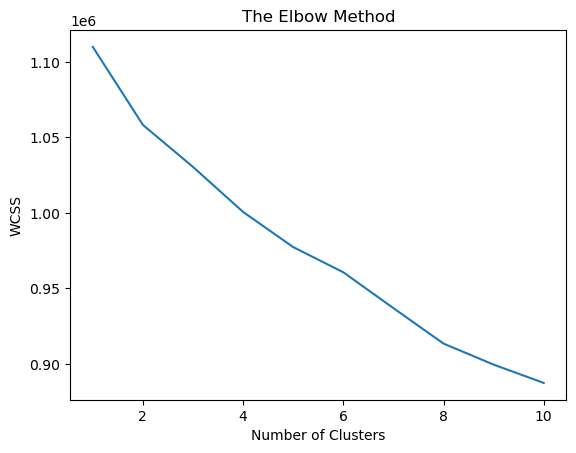

In [35]:
plt.plot(range(1,11), wcss)
plt.title("The Elbow Method")
plt.xlabel("Number of Clusters")
plt.ylabel("WCSS")
plt.show()